In [34]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.preprocessing import LabelEncoder
 from sklearn.linear_model import LogisticRegression
 from sklearn.linear_model import LinearRegression

## Classificação

In [3]:
# Coleta de Dados
df = pd.read_csv('https://pycourse.s3.amazonaws.com/temperature.csv')

In [9]:
# Define a coluna date como index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [11]:
# Definição do X e Y
x, y = df[['temperatura']].values, df[['classification']].values
print('x = ', x)
print('y = ', y)

x =  [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
y =  [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


In [12]:
# conversão de Y para valores numericos
le = LabelEncoder()
y = le.fit_transform(y.ravel())
print('y = ', y)

y =  [3 2 3 3 0 1]


In [14]:
# Classificador
clf = LogisticRegression()
clf.fit(x, y)

LogisticRegression()

In [18]:
# gerando 100 valores de temperaturas
x_test = np.linspace(start = 0., stop = 45., num = 100).reshape(-1,1)

# predição de x_test
y_pred = clf.predict(x_test)

In [19]:
# conversão dos valores y_test pro valor original
y_pred = le.inverse_transform(y_pred)

In [20]:
# saida
saida = {
    'new_temp': x_test.ravel(),
    'new_class': y_pred.ravel()
}
df_saida = pd.DataFrame(saida)

In [22]:
df_saida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [23]:
df_saida.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


<AxesSubplot:title={'center':'# de novos valores gerados'}>

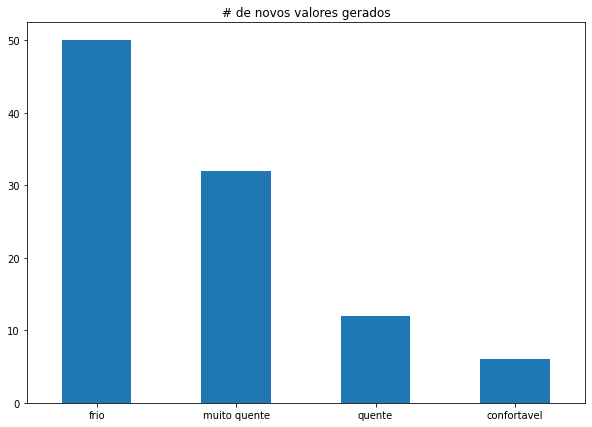

In [25]:
# contagem dos valores gerados
df_saida['new_class'].value_counts().plot.bar(
    figsize = (10,7),
    rot = 0,
    title = '# de novos valores gerados'
)

<AxesSubplot:title={'center':'new_temp'}, xlabel='[new_class]'>

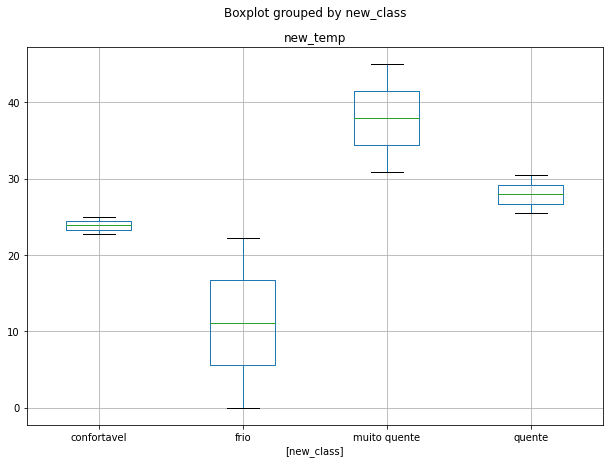

In [26]:
# boxplot
df_saida.boxplot(by = 'new_class', figsize = (10,7))

In [28]:
# Sistema Automatico
def classify_temp():
    ask = True
    while ask:
        temp = float(input('Insira a temperatura'))
        temp = np.array(temp).reshape(-1,1)
        class_temp = clf.predict(temp)
        class_temp = le.inverse_transform(class_temp)
        print(f'A classificação da temperatura {temp.ravel()[0]} é: {class_temp[0]}')
        ask = input('Nova Classificação (y/n): ') == 'y'

In [29]:
# chamando a sistema automatico
classify_temp()

A classificação da temperatura 11.4 é: frio
A classificação da temperatura 44.3 é: muito quente
A classificação da temperatura 19.9 é: frio
A classificação da temperatura 23.5 é: confortavel
A classificação da temperatura 99.0 é: muito quente
A classificação da temperatura 17.6 é: frio


## Regressão Linear

In [31]:
# dados
x = [-1, -0.77777778, -0.555555559, -0.33333333, -0.1111111111, 0.11111111111, 0.3333333333, 0.555555555, 0.777777778, 1]
y = [-1.111189389, -0.55859058, -0.2098098, 0.54495884, 0.4993839, 1.1429048, 1.6409090, 2.13434234, 2.6434333, 2.95334342]

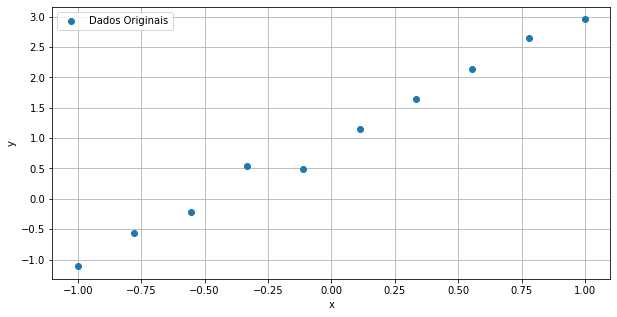

In [32]:
# plot dos dados
plt.figure(figsize = (10, 5))
plt.plot(x, y, 'o', label = 'Dados Originais')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [35]:
# tranformando para numpy arraye vetor coluna
x, y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)

# modelo
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [36]:
# valor estimado de a e b
print('a = ', reg.coef_.ravel()[0])
print('b = ', reg.intercept_[0])

a =  2.0358298495993825
b =  0.9679685836476382


In [37]:
# predição do modelo
y_pred = reg.predict(x)

In [38]:
# score do modelo
print('score = ', reg.score(x,y))

score =  0.991409817387698
